In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
df = pd.read_csv('../chidata/food_inspections.csv')

## clean
# drop uninformative outcomes
outcomes = ['Pass', 'Pass w/ Conditions', 'Out of Business']
df = df[(df['Results'] == outcomes[0]) | (df['Results'] == outcomes[1]) | (df['Results'] == outcomes[2])]

# convert string dates into usable type
from datetime import datetime as dt
df['Inspection Date'] = df['Inspection Date'].map(lambda x: dt.strptime(x, '%m/%d/%Y'))
# capture day of week, month of year of inspection
df['Inspection Day'] = df['Inspection Date'].map(lambda x: x.weekday() + 1)
df['Inspection Month'] = df['Inspection Date'].map(lambda x: x.month)

KeyError: 'Inspection Date'

In [ ]:
df.columns.values

2010-01-04 00:00:00 2016-11-04 00:00:00


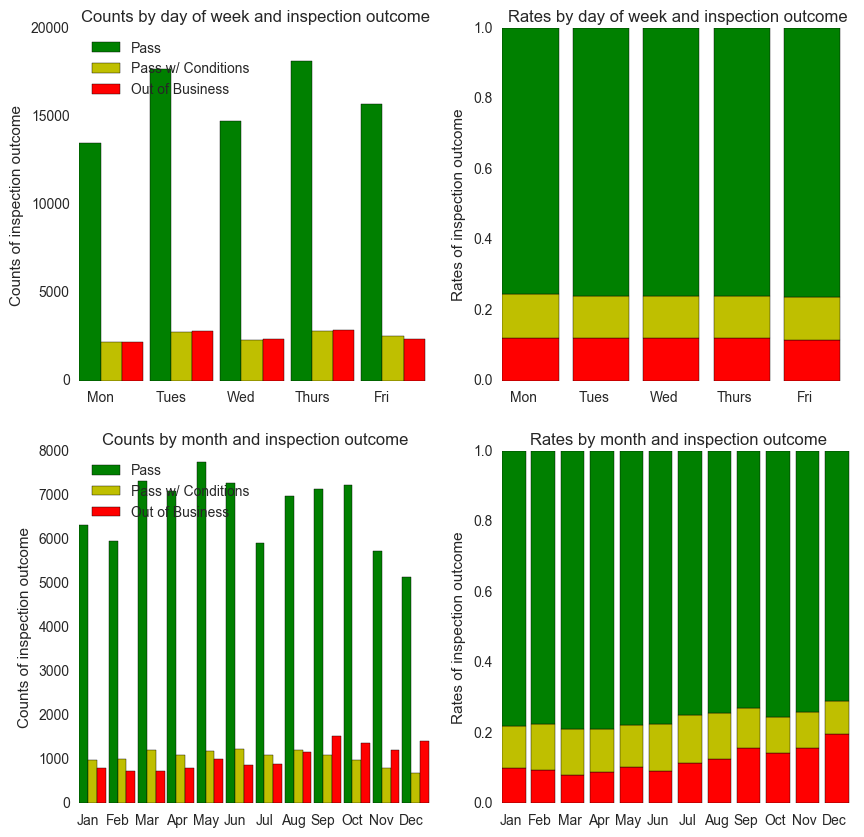

ValueError: max() arg is an empty sequence

In [9]:
# range of dates
print min(df['Inspection Date']), max(df['Inspection Date'])

## slice data

# by day of week
counts_by_day = []
for i in range(1,8):
    sliced_df = df[df['Inspection Day'] == i]
    counts = [sliced_df[sliced_df['Results'] == outcome].shape[0] for outcome in outcomes]
    counts_by_day.append(tuple(counts))

# ill fix this
rates_by_day = zip(map(lambda t: t[0] / float(sum(list(t))), counts_by_day), map(lambda t: t[1] / float(sum(list(t))), counts_by_day), map(lambda t: t[2] / float(sum(list(t))), counts_by_day))




# by month of year
counts_by_month = []
for i in range(1,13):
    sliced_df = df[df['Inspection Month'] == i]
    counts = [sliced_df[sliced_df['Results'] == outcome].shape[0] for outcome in outcomes]
    counts_by_month.append(tuple(counts))

# ill fix this
rates_by_month = zip(map(lambda t: t[0] / float(sum(list(t))), counts_by_month), map(lambda t: t[1] / float(sum(list(t))), counts_by_month), map(lambda t: t[2] / float(sum(list(t))), counts_by_month))





## visualize

fig = plt.figure(figsize=(10,10))  

# counts by day
outcome_1, outcome_2, outcome_3 = map(lambda t: t[0], counts_by_day)[0:5], map(lambda t: t[1], counts_by_day)[0:5], map(lambda t: t[2], counts_by_day)[0:5]
bar_loc = np.arange(5)
bar_width = 0.3

ax_1 = fig.add_subplot(2,2,1)

rects_1 = ax_1.bar(bar_loc, outcome_1, bar_width, color = 'g')
rects_2 = ax_1.bar(bar_loc + bar_width, outcome_2, bar_width, color = 'y')
rects_3 = ax_1.bar(bar_loc + 2 * bar_width, outcome_3, bar_width, color = 'r')
ax_1.legend((rects_1[0], rects_2[0], rects_3[0]), (outcomes[0], outcomes[1], outcomes[2]), loc = 2)

ax_1.set_ylabel('Counts of inspection outcome')
ax_1.set_title('Counts by day of week and inspection outcome')
ax_1.set_xticks(bar_loc + bar_width)
ax_1.set_xticklabels(('Mon', 'Tues', 'Wed', 'Thurs', 'Fri'))
ax_1.set_axis_bgcolor('white')


# proportions by day

outcome_1, outcome_2, outcome_3 = map(lambda t: t[0], rates_by_day)[0:5], map(lambda t: t[1], rates_by_day)[0:5], map(lambda t: t[2], rates_by_day)[0:5]

ax_2 = fig.add_subplot(2,2,2)


bar_loc = np.arange(5)


ax_2.bar(bar_loc, outcome_3, color = 'r')
ax_2.bar(bar_loc, outcome_2, bottom = outcome_3, color = 'y')
ax_2.bar(bar_loc, outcome_1, bottom = [i + j for i, j in zip(outcome_2, outcome_3)], color = 'g')


ax_2.set_ylabel('Rates of inspection outcome')
ax_2.set_title('Rates by day of week and inspection outcome')
ax_2.set_xticks(bar_loc + bar_width)
ax_2.set_xticklabels(('Mon', 'Tues', 'Wed', 'Thurs', 'Fri'))
ax_2.set_axis_bgcolor('white')





# N = 5
# menMeans = (20, 35, 30, 35, 27)
# womenMeans = (25, 32, 34, 20, 25)
# menStd = (2, 3, 4, 1, 2)
# womenStd = (3, 5, 2, 3, 3)
# ind = np.arange(N)    # the x locations for the groups
# width = 0.35       # the width of the bars: can also be len(x) sequence

# p1 = plt.bar(ind, menMeans, width, color='r', yerr=menStd)
# p2 = plt.bar(ind, womenMeans, width, color='y',
#              bottom=menMeans, yerr=womenStd)

# plt.ylabel('Scores')
# plt.title('Scores by group and gender')
# plt.xticks(ind + width/2., ('G1', 'G2', 'G3', 'G4', 'G5'))
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))

# plt.show()



# counts by month

outcome_1, outcome_2, outcome_3 = map(lambda t: t[0], counts_by_month), map(lambda t: t[1], counts_by_month), map(lambda t: t[2], counts_by_month)
bar_loc = np.arange(12)
bar_width = 0.3

ax_3 = fig.add_subplot(2,2,3)

rects_1 = ax_3.bar(bar_loc, outcome_1, bar_width, color = 'g')
rects_2 = ax_3.bar(bar_loc + bar_width, outcome_2, bar_width, color = 'y')
rects_3 = ax_3.bar(bar_loc + 2 * bar_width, outcome_3, bar_width, color = 'r')
ax_3.legend((rects_1[0], rects_2[0], rects_3[0]), (outcomes[0], outcomes[1], outcomes[2]), loc = 2)

ax_3.set_ylabel('Counts of inspection outcome')
ax_3.set_title('Counts by month and inspection outcome')
ax_3.set_xticks(bar_loc + bar_width)
ax_3.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
ax_3.set_axis_bgcolor('white')



    
# proportions by month

outcome_1, outcome_2, outcome_3 = map(lambda t: t[0], rates_by_month), map(lambda t: t[1], rates_by_month), map(lambda t: t[2], rates_by_month)

ax_4 = fig.add_subplot(2,2,4)

bar_loc = np.arange(12)


ax_4.bar(bar_loc, outcome_3, color = 'r')
ax_4.bar(bar_loc, outcome_2, bottom = outcome_3, color = 'y')
ax_4.bar(bar_loc, outcome_1, bottom = [i + j for i, j in zip(outcome_2, outcome_3)], color = 'g')

ax_4.set_ylabel('Rates of inspection outcome')
ax_4.set_title('Rates by month and inspection outcome')
ax_4.set_xticks(bar_loc + bar_width)
ax_4.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
ax_4.set_axis_bgcolor('white')




plt.show()
plt.tight_layout()



print pass_perc_by_day



